# Capstone Project : Walmart

#### Problem Statement 1:

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

1.You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

2.Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

## 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

## 2. Loading Dataset

In [2]:
Data = pd.read_csv("D:/Project/Walmart.csv")
Data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

## 3. Exploratory Data Analysis

In [3]:
Data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
Data.value_counts()

Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      01-04-2011  1495064.75    0             59.17        3.524       214.837166  7.682           1
30     30-09-2011  387001.13     0             78.91        3.355       216.362033  7.852           1
31     02-07-2010  1311704.92    0             82.29        2.669       210.880373  8.099           1
       02-04-2010  1357600.68    0             64.12        2.719       210.479887  8.200           1
       02-03-2012  1427881.22    0             59.30        3.630       220.486689  7.057           1
                                                                                                   ..
15     30-12-2011  603460.79     1             31.44        3.566       136.643258  7.866           1
       30-09-2011  521297.31     0             64.87        3.858       136.419500  7.806           1
       30-07-2010  619224.06     0             72.04        2.932       132.598387  8.0

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
Data.describe(include='all')

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000   
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000   
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment  
count   6435.000000  6435.000000   6435.000000  
unique          NaN          NaN           NaN  
top             NaN          NaN           NaN  
freq            NaN          NaN           NaN  
mean       3.358607   171.578394      7.999151  
std        0.459020    39.356712      1.875885  
min        2.472000   126.064000      3.879000  
25%        2.933000   131.735000      6.891000  
50%        3.445000   182.616521      7.874000  
75%        3.735000   212.743293      8.622000  
max        4.468000   227.232807     14.313000

In [51]:
# Check for missing values.
Data.isna().sum()

index           0
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

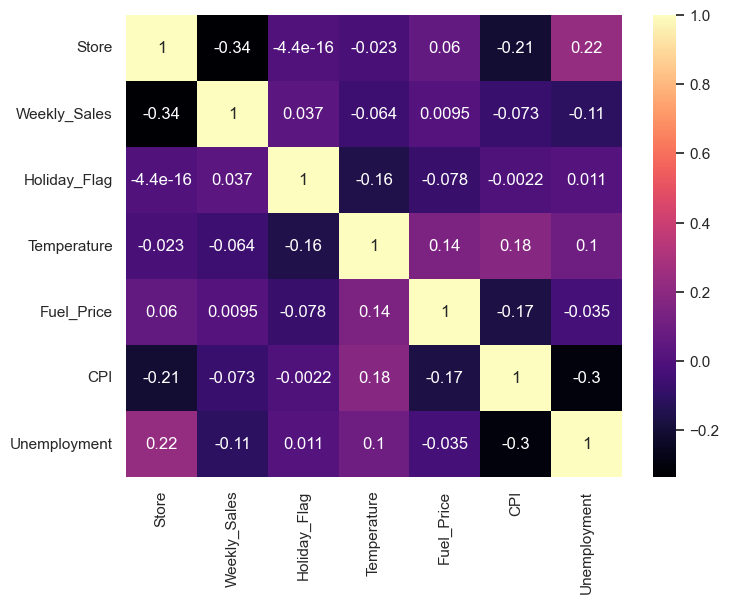

In [8]:
Data1 = Data.drop(columns=['Date'])
sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(Data1.corr(), annot=True, cmap='magma')
plt.show()

In [10]:
Data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

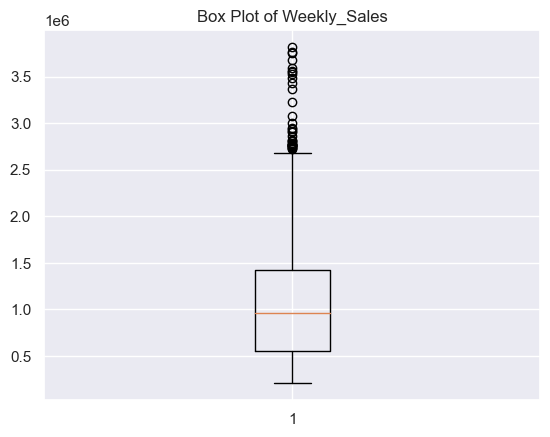

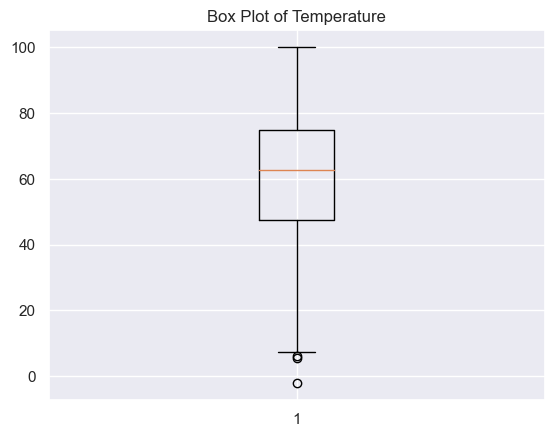

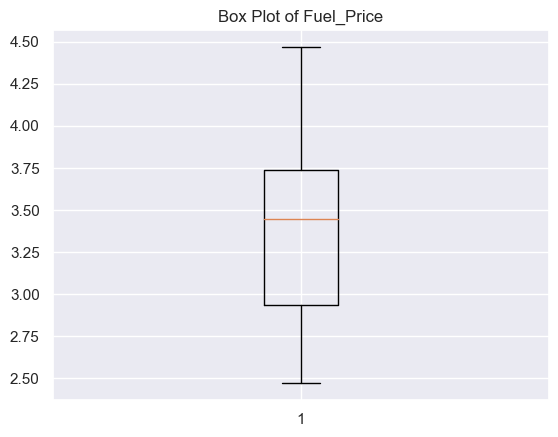

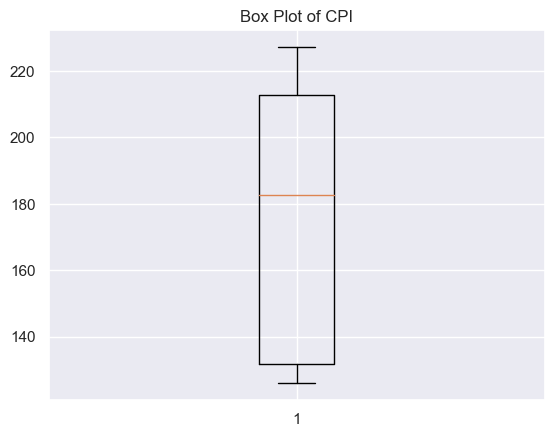

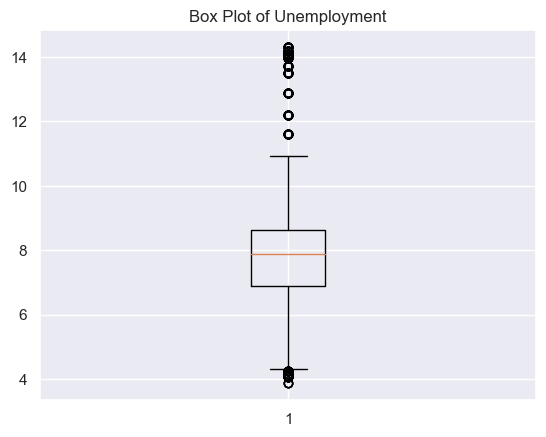

In [11]:
columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create box plots for each column using a for loop
for col in columns:
    plt.figure()  # Create a new figure for each column
    plt.boxplot(Data[col])  # Create the box plot
    plt.title(f'Box Plot of {col}')  # Set the title
    plt.show()  # Display the plot

In [12]:
Data.sample(3)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
638       5  13-05-2011     290930.01             0        77.38       3.899   
850       6  07-09-2012    1608077.01             1        86.33       3.730   
3411     24  08-06-2012    1406313.13             0        59.93       3.871   

             CPI  Unemployment  
638   216.534361         6.489  
850   224.056008         5.668  
3411  138.117419         8.983

In [13]:
Data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [14]:
len(Data['Store'].unique())

45

### Part 1. a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


Let just pick those who have less Weekly Sales. As it will be too lenghty to analyze 45 stores.

We will pick those stores for which weekly sales is less than 10 percentile.

In [15]:
# round() function is used to round the value returned by Data['Weekly_Sales'].quantile(0.1) to two decimal places.

a1 = Data['Weekly_Sales'].quantile(0.1).round(2)

In [16]:
# the variable 'less_weekly_sales' contains an array or list of unique store numbers where the weekly sales
# are below the threshold 'a1'.(Here a1 contains no of stores where weekly_sales are less than 10 percent)

less_weekly_sales = Data.loc[Data['Weekly_Sales'] < a1, 'Store'].unique()
less_weekly_sales

array([ 3,  5,  7, 16, 30, 33, 36, 38, 44], dtype=int64)

Lets check if low value of sales are anyhow affected by unemployment rate.

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

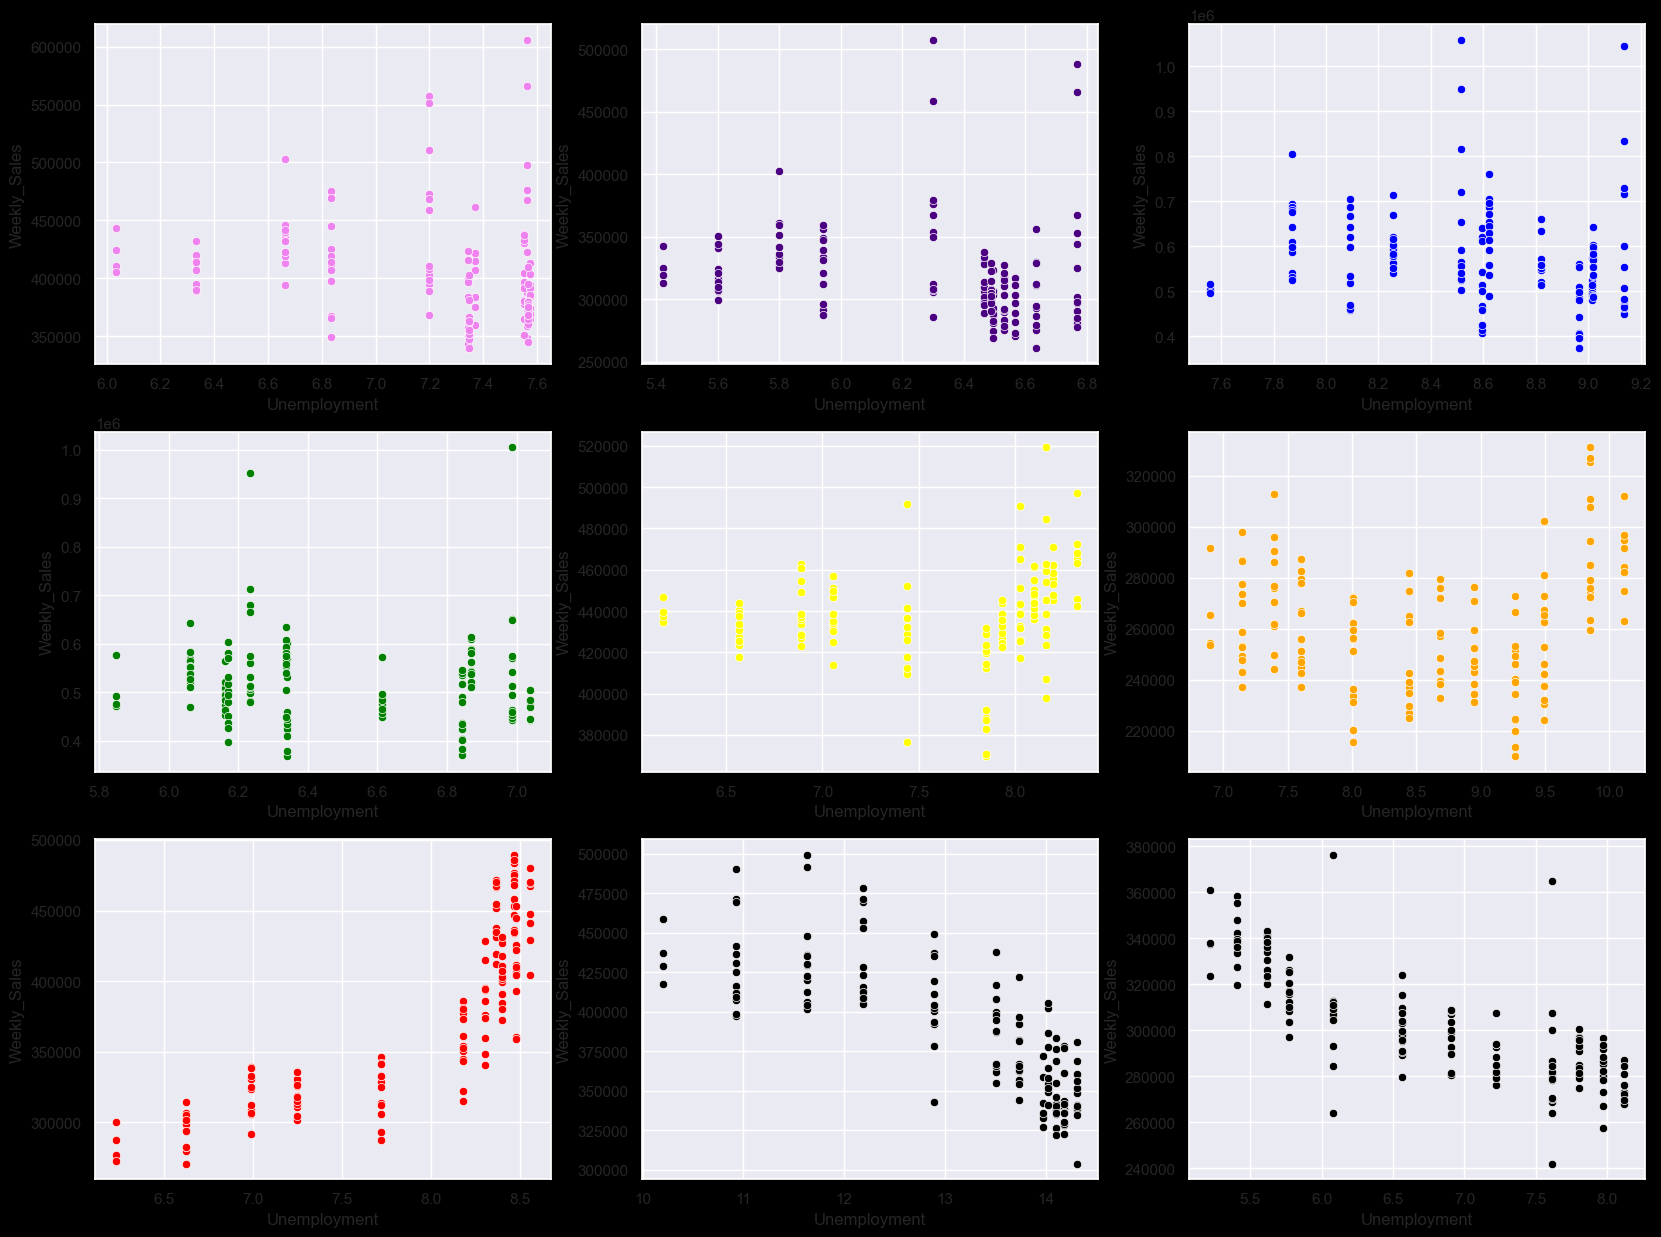

In [17]:
plt.figure(figsize=(20,15),facecolor='black')

#data= is a parameter within the sns.scatterplot() function call, 
# and it specifies the DataFrame that contains the data to be plotted.

plt.subplot(3,3,1)
sns.scatterplot(data=Data[Data['Store'] == 3], x='Unemployment', y='Weekly_Sales',color='violet')

plt.subplot(3,3,2)
sns.scatterplot(data=Data[Data['Store'] == 5], x='Unemployment', y='Weekly_Sales',color='indigo')


plt.subplot(3,3,3)
sns.scatterplot(data=Data[Data['Store'] == 7], x='Unemployment', y='Weekly_Sales',color='blue')

plt.subplot(3,3,4)
sns.scatterplot(data=Data[Data['Store'] == 16], x='Unemployment',y='Weekly_Sales',color='green')


plt.subplot(3,3,5)
sns.scatterplot(data=Data[Data['Store'] == 30], x='Unemployment',y='Weekly_Sales',color='yellow')


plt.subplot(3,3,6)
sns.scatterplot(data=Data[Data['Store'] == 33], x='Unemployment',y='Weekly_Sales',color='orange')
plt.title='Store33'

plt.subplot(3,3,7)
sns.scatterplot(data=Data[Data['Store'] == 36], x='Unemployment',y='Weekly_Sales',color='red')


plt.subplot(3,3,8)
sns.scatterplot(data=Data[Data['Store'] == 38], x='Unemployment', y='Weekly_Sales',color='black')


plt.subplot(3,3,9)
sns.scatterplot(data=Data[Data['Store'] == 44], x='Unemployment',y='Weekly_Sales',color='black')

Clearly we can see that in Store number 5 although average of weekly sales is not impacted by unemployement rate, but more density is higher on the higher side of unemployment rate.


There are two Stores we can identify in which weekly sales reduces as the unemployment rate increases. Those stores are Store number 38 and 44

### b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [18]:
Data['Date'] = pd.to_datetime(Data['Date'], format='%d-%m-%Y')

In [19]:
Sales_date = Data[['Date','Weekly_Sales']]

In [20]:
Sales_date.set_index('Date',inplace=True)

In [21]:
Sales_date.head()

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68

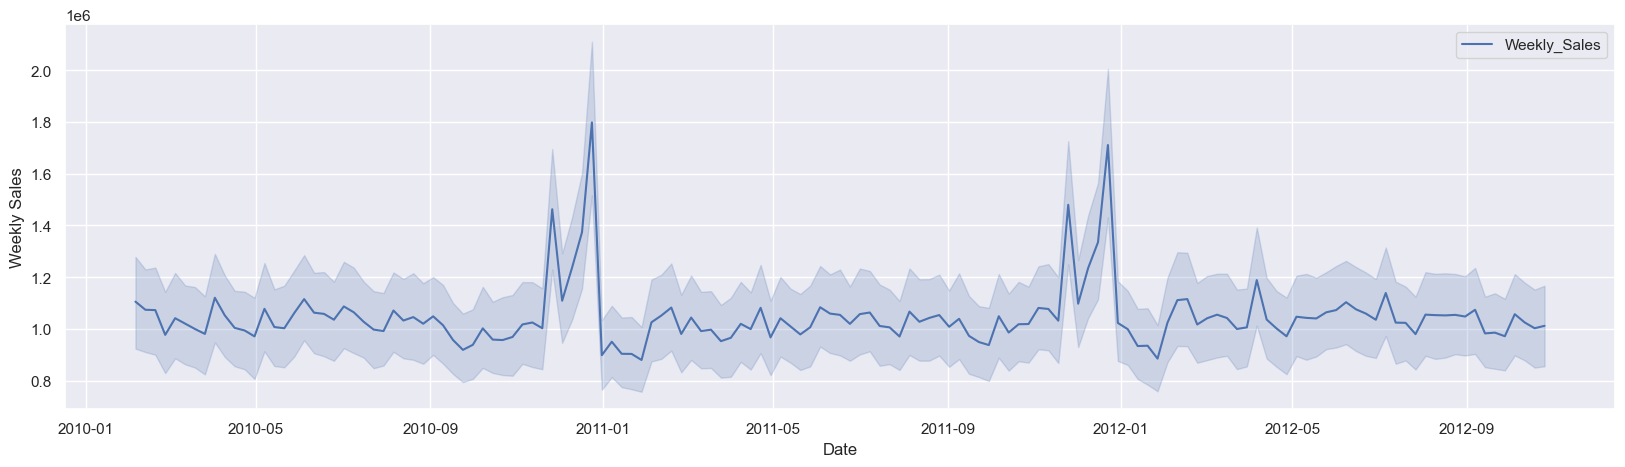

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Sales_date)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

plt.show()

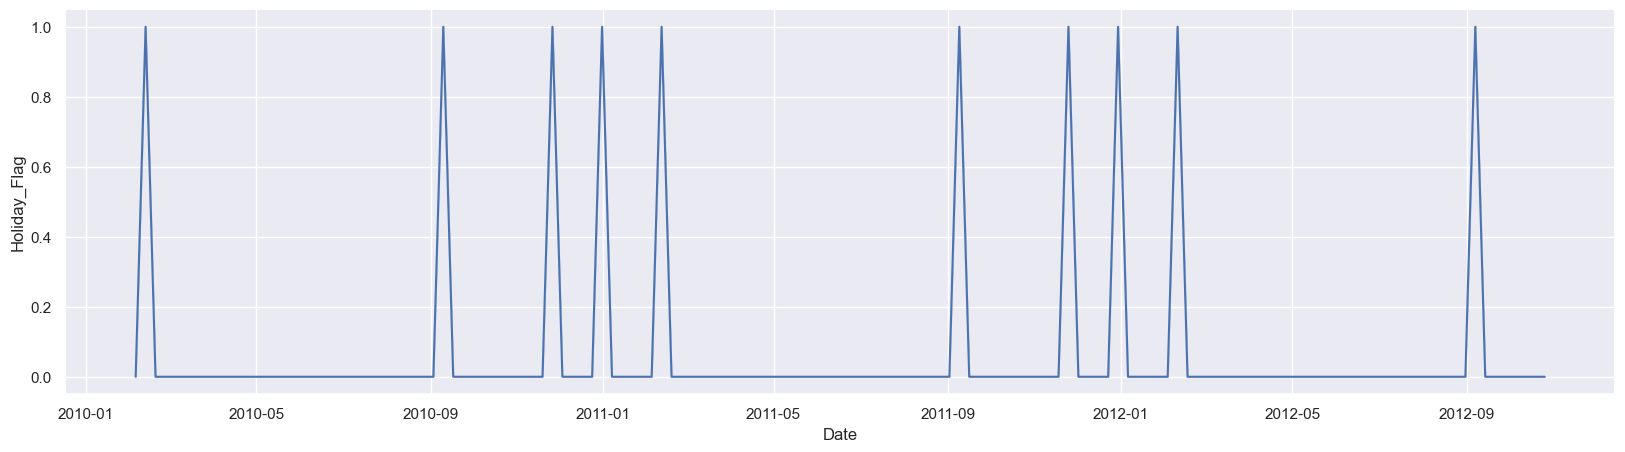

In [23]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Data,x='Date',y='Holiday_Flag')

plt.show()

We can clearly see there is a seasonality component in weekly sales. Whole year sales is average. But at the end of the year there is an exponential hike in the sales.

The Major Reason is during this time of the year, the holiday season begins.

So, the spike in the sales overlaps with the holiday season.

As we know Walmart is very famous in USA, and there is a holiday season during christmans and new year, there might be a lot of offers being given by brands in holiday season. This explains the sudden spike in the sales at the end of the year.

### c. Does temperature affect the weekly sales in any manner?

<AxesSubplot:xlabel='Date'>

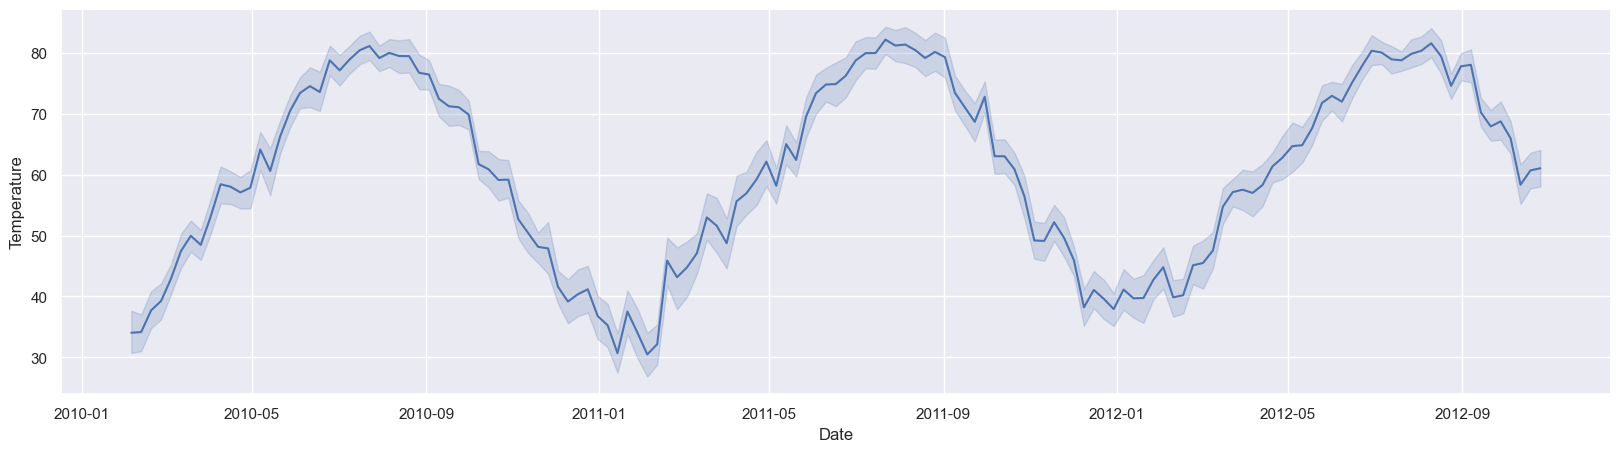

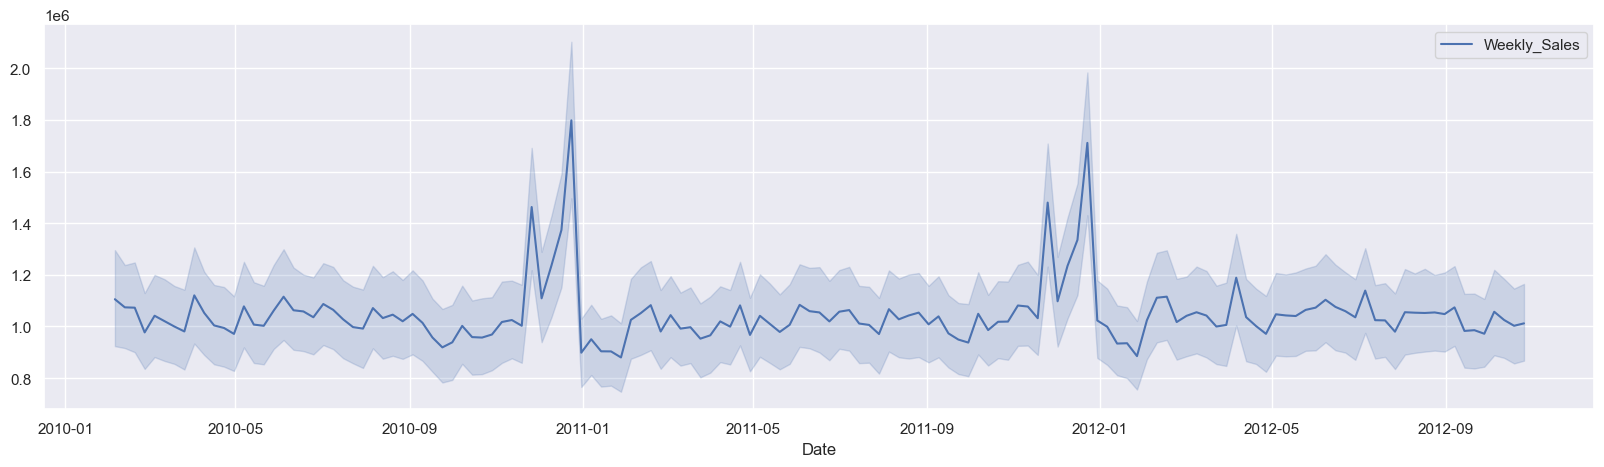

In [24]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Data, x='Date', y='Temperature')

plt.figure(figsize=(20,5))
sns.lineplot(data=Sales_date)

The only noted effect that can be seen is again of the holiday season. Holiday season are marked with winters and snow, that increases the needed clothing and stuff. Other than this there is no such clear trend of shopping related with temprature.

### d. How is the Consumer Price index affecting the weekly sales of various stores?

In [25]:
Data.head(3)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106

<AxesSubplot:xlabel='Date'>

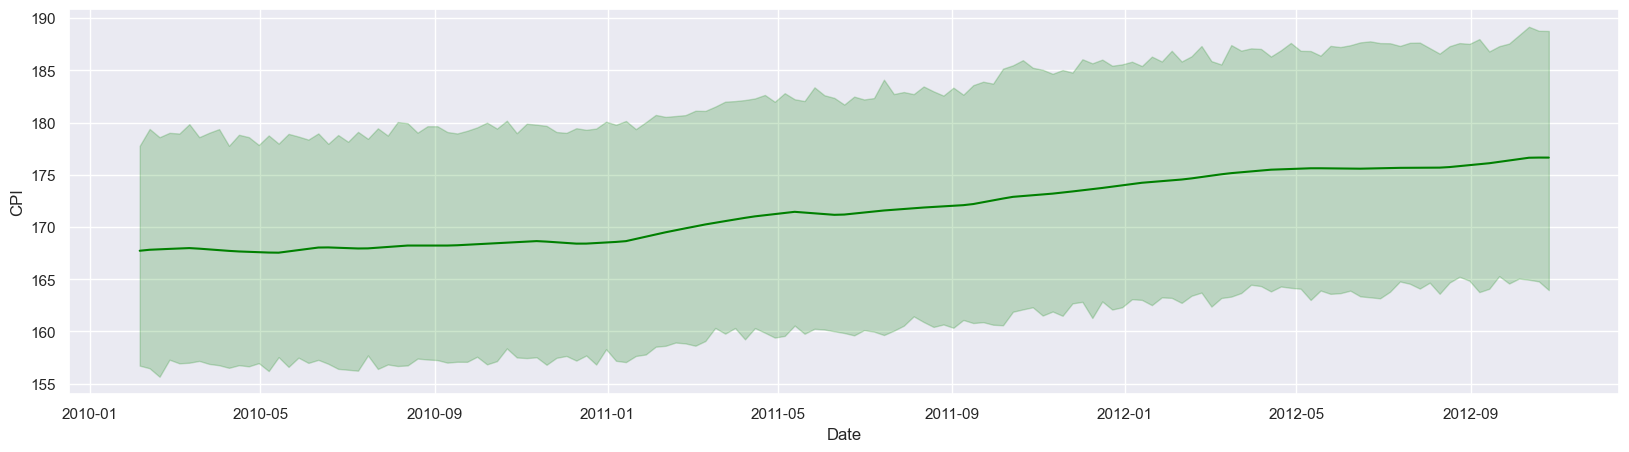

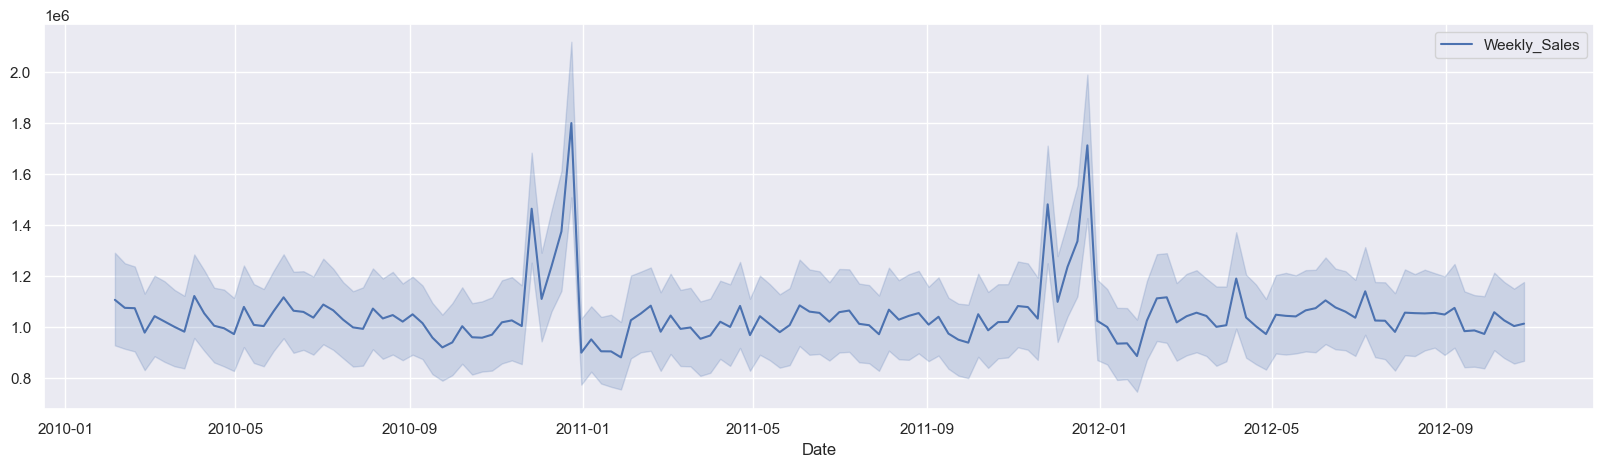

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Data,x='Date',y='CPI',color='green')

plt.figure(figsize=(20,5))
sns.lineplot(data=Sales_date)

Although there is inflation over time represented by increasing CPI over the time period. There is no upward or downward trend followed by weekly sales.

### e. Top performing stores according to the historical data.

Lets check the store with maximum average sales over the given period.

In [27]:
average_store_sales = Data.groupby('Store')['Weekly_Sales'].agg('mean')

In [28]:
average_store_sales

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

In [29]:
avg_sales=pd.DataFrame(average_store_sales)

In [30]:
avg_sales

Weekly_Sales
Store              
1      1.555264e+06
2      1.925751e+06
3      4.027044e+05
4      2.094713e+06
5      3.180118e+05
6      1.564728e+06
7      5.706173e+05
8      9.087495e+05
9      5.439806e+05
10     1.899425e+06
11     1.356383e+06
12     1.009002e+06
13     2.003620e+06
14     2.020978e+06
15     6.233125e+05
16     5.192477e+05
17     8.935814e+05
18     1.084718e+06
19     1.444999e+06
20     2.107677e+06
21     7.560691e+05
22     1.028501e+06
23     1.389864e+06
24     1.356755e+06
25     7.067215e+05
26     1.002912e+06
27     1.775216e+06
28     1.323522e+06
29     5.394514e+05
30     4.385796e+05
31     1.395901e+06
32     1.166568e+06
33     2.598617e+05
34     9.667816e+05
35     9.197250e+05
36     3.735120e+05
37     5.189003e+05
38     3.857317e+05
39     1.450668e+06
40     9.641280e+05
41     1.268125e+06
42     5.564039e+05
43     6.333247e+05
44     3.027489e+05
45     7.859814e+05

In [31]:
avg_sales['Weekly_Sales']=avg_sales['Weekly_Sales']/(avg_sales['Weekly_Sales'].max()-avg_sales['Weekly_Sales'].min())

In [32]:
avg_sales

Weekly_Sales
Store              
1          0.841677
2          1.042177
3          0.217935
4          1.133616
5          0.172102
6          0.846799
7          0.308806
8          0.491797
9          0.294391
10         1.027930
11         0.734047
12         0.546051
13         1.084319
14         1.093712
15         0.337324
16         0.281006
17         0.483588
18         0.587028
19         0.782004
20         1.140632
21         0.409169
22         0.556604
23         0.752166
24         0.734248
25         0.382463
26         0.542755
27         0.960711
28         0.716263
29         0.291940
30         0.237350
31         0.755433
32         0.631323
33         0.140632
34         0.523203
35         0.497736
36         0.202137
37         0.280818
38         0.208750
39         0.785072
40         0.521766
41         0.686284
42         0.301114
43         0.342742
44         0.163842
45         0.425357

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

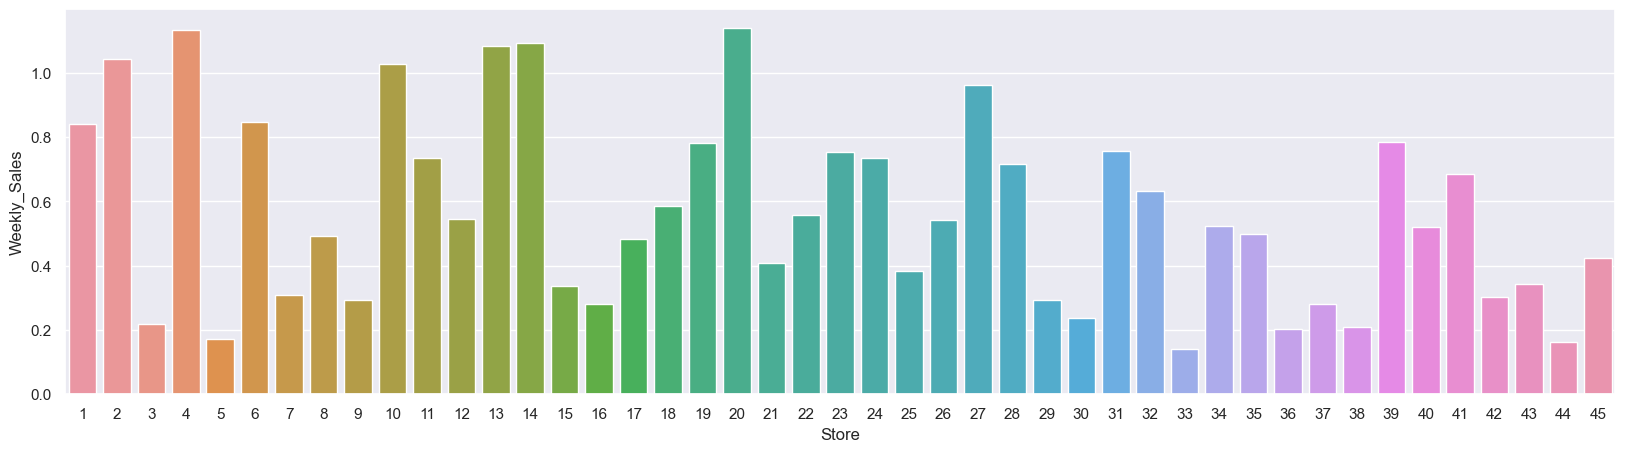

In [33]:
plt.figure(figsize=(20,5))
sns.barplot(data=avg_sales,x=avg_sales.index,y='Weekly_Sales')

In [34]:
avg_sales.sort_values('Weekly_Sales',ascending=False).head(10)

Weekly_Sales
Store              
20         1.140632
4          1.133616
14         1.093712
13         1.084319
2          1.042177
10         1.027930
27         0.960711
6          0.846799
1          0.841677
39         0.785072

Top performing stores are --> store number 20, 4, 14, 13, 2, 10

In [36]:
Store_20 = avg_sales[avg_sales.index == 20]
Store_20

Weekly_Sales
Store              
20         1.140632

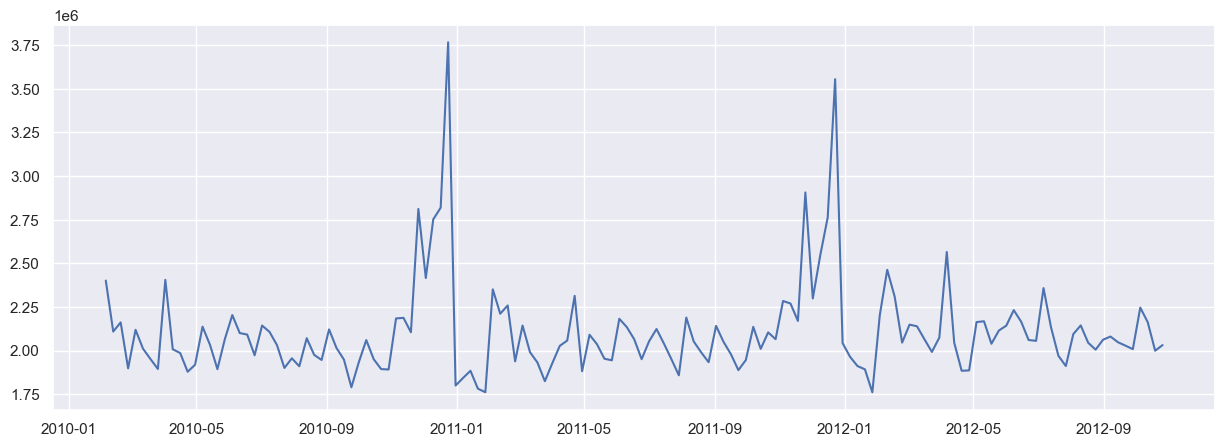

In [52]:
store20 = Data[Data['Store']==20]
plt.figure(figsize=(15,5))
plt.plot(store20['Date'],store20['Weekly_Sales'])
plt.show()

### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [35]:
avg_sales.sort_values('Weekly_Sales',ascending=True).head(10)

Weekly_Sales
Store              
33         0.140632
44         0.163842
5          0.172102
36         0.202137
38         0.208750
3          0.217935
30         0.237350
37         0.280818
16         0.281006
29         0.291940

Worst performing stores are 33, 44, 5, 36, 38, 3.

In [37]:
Store_33 = avg_sales[avg_sales.index == 33]
Store_33

Weekly_Sales
Store              
33         0.140632

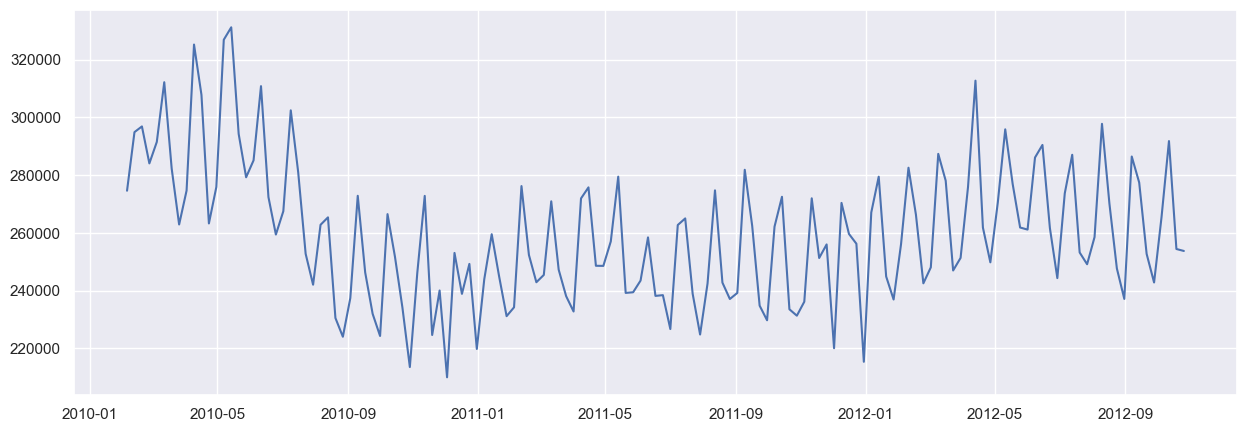

In [38]:
store33=Data[Data['Store']==33]
plt.figure(figsize=(15,5))
plt.plot(store33['Date'],store33['Weekly_Sales'])
plt.show()

In [39]:
sales_20 = Data[(Data['Store'] == 20) & (Data['Date'].dt.year == 2012)]
sales_33 = Data[(Data['Store'] == 33) & (Data['Date'].dt.year == 2012)]

sales_20.set_index('Date',inplace = True)
sales_33.set_index('Date',inplace = True)

y1=sales_33.Weekly_Sales
y2=sales_20.Weekly_Sales

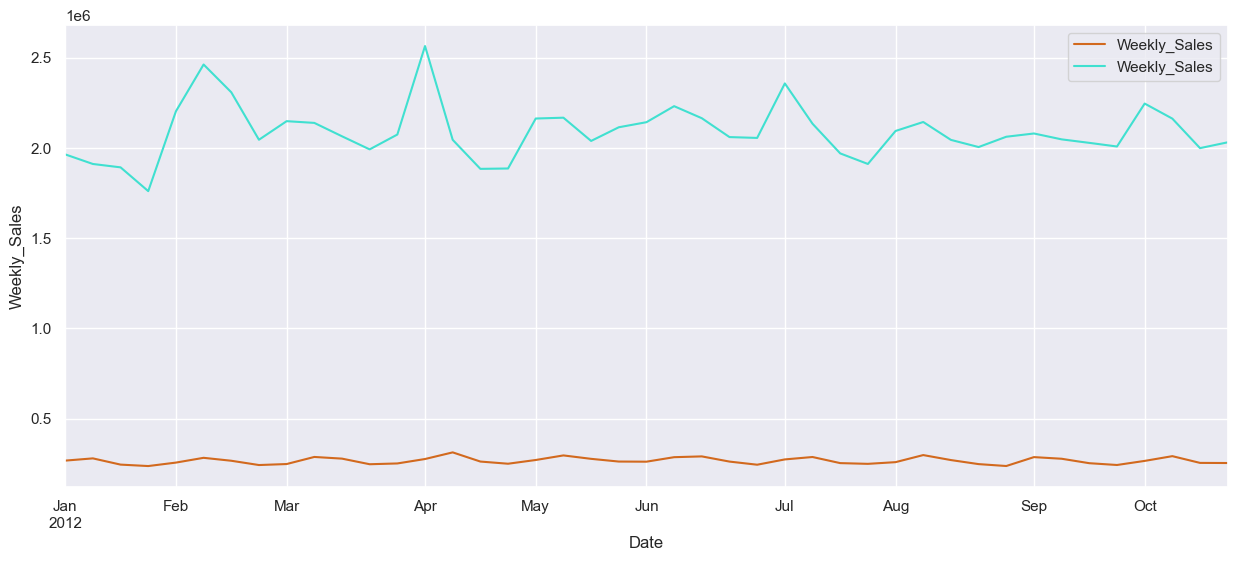

In [40]:

y1['2012'].plot(figsize=(15, 6), legend=True, color='chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color='turquoise')

plt.ylabel("Weekly_Sales")
plt.show()


In [41]:
avg_sales_2=pd.DataFrame(average_store_sales)

In [42]:
avg_sales_2

Weekly_Sales
Store              
1      1.555264e+06
2      1.925751e+06
3      4.027044e+05
4      2.094713e+06
5      3.180118e+05
6      1.564728e+06
7      5.706173e+05
8      9.087495e+05
9      5.439806e+05
10     1.899425e+06
11     1.356383e+06
12     1.009002e+06
13     2.003620e+06
14     2.020978e+06
15     6.233125e+05
16     5.192477e+05
17     8.935814e+05
18     1.084718e+06
19     1.444999e+06
20     2.107677e+06
21     7.560691e+05
22     1.028501e+06
23     1.389864e+06
24     1.356755e+06
25     7.067215e+05
26     1.002912e+06
27     1.775216e+06
28     1.323522e+06
29     5.394514e+05
30     4.385796e+05
31     1.395901e+06
32     1.166568e+06
33     2.598617e+05
34     9.667816e+05
35     9.197250e+05
36     3.735120e+05
37     5.189003e+05
38     3.857317e+05
39     1.450668e+06
40     9.641280e+05
41     1.268125e+06
42     5.564039e+05
43     6.333247e+05
44     3.027489e+05
45     7.859814e+05

In [43]:
(avg_sales_2.loc[33][0]/avg_sales_2.loc[20][0])*100

12.329294669579147

Lowest performing store's sales only accounts for 12% of sales done by top performing store on average.

### Part 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [44]:
!pip install prophet

In [45]:
from plotly import graph_objs as go
from prophet import Prophet
from prophet.plot import plot_plotly

In [46]:
Data = Data.reset_index()
Data

index  Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
0         0      1 2010-02-05    1643690.90             0        42.31   
1         1      1 2010-02-12    1641957.44             1        38.51   
2         2      1 2010-02-19    1611968.17             0        39.93   
3         3      1 2010-02-26    1409727.59             0        46.63   
4         4      1 2010-03-05    1554806.68             0        46.50   
...     ...    ...        ...           ...           ...          ...   
6430   6430     45 2012-09-28     713173.95             0        64.88   
6431   6431     45 2012-10-05     733455.07             0        64.89   
6432   6432     45 2012-10-12     734464.36             0        54.47   
6433   6433     45 2012-10-19     718125.53             0        56.47   
6434   6434     45 2012-10-26     760281.43             0        58.85   

      Fuel_Price         CPI  Unemployment  
0          2.572  211.096358         8.106  
1          2.548  211.242170         8.106  
2          2.514  211.289143         8.106  
3          2.561  211.319643         8.106  
4          2.625  211.350143         8.106  
...          ...         ...           ...  
6430       3.997  192.013558         8.684  
6431       3.985  192.170412         8.667  
6432       4.000  192.327265         8.667  
6433       3.969  192.330854         8.667  
6434       3.882  192.308899         8.667  

[6435 rows x 9 columns]

In [47]:
store_number = int(input('Enter store number:'))

df1 = Data[Data['Store']==store_number]

Data_train = df1[['Date', 'Weekly_Sales']]

Data_train = Data_train.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

model = Prophet()

model.fit(Data_train)

future = model.make_future_dataframe(periods=84) # 12 weeks

forecast = model.predict(future)

plot_plotly(model, forecast)

Enter store number:33


19:13:39 - cmdstanpy - INFO - Chain [1] start processing
19:13:39 - cmdstanpy - INFO - Chain [1] done processing


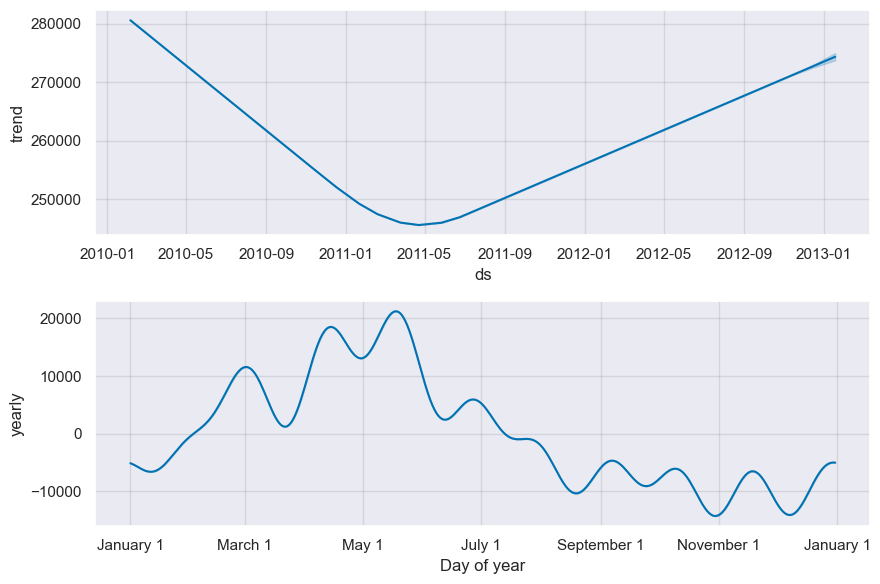

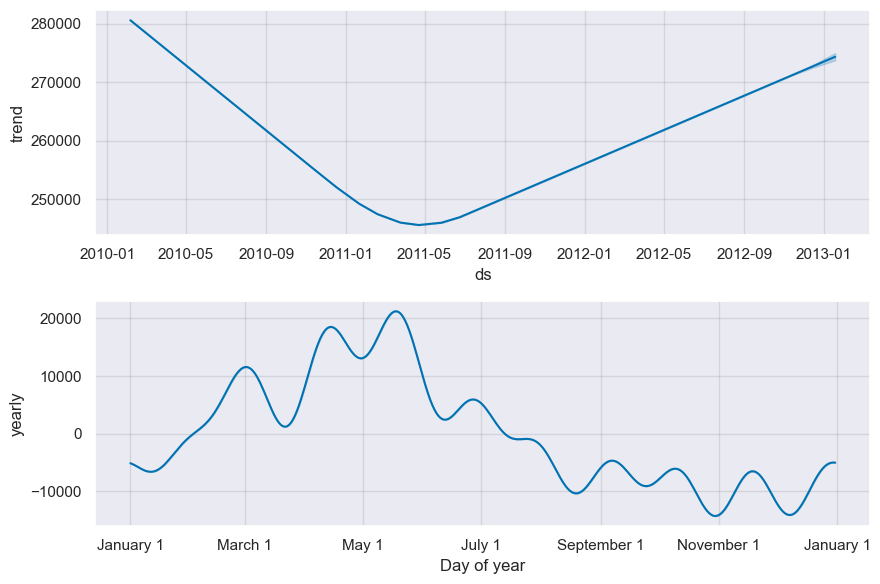

In [48]:
model.plot_components(forecast)